In [1]:
#Crie um vetor ordenado com 1000 números aleatórios entre 0 e 10000, suporemos que é um grandeza temporal e a que unidade é o segundo

# dicas: - pode utilizar a função random.univerm da bibliteca numpy
#        - para criar um vetor pode-se utilizar a função nativa range(n) e para ordená-lo a função sorted como no exemplo abaixo
#

#Esta será a sua ordenada, equivalente à 1000 decaimentos da partícula múon em diferentes momentos

import numpy as np

X = sorted([np.random.uniform(0,100) for n in range(100)])

In [2]:
import numpy as np

X = sorted([np.random.uniform(0,10000) for n in range(1000)])

In [3]:
#Para cada número da ordenada, crie um valor da absissa com a seguinte relação exponencial

# fid(x) = lambd*exp(-lambd*x)
# onde lambd = infira o lambda a partir da meia vida do múon, que é igual a 11 minutos

# dicas: - crie um novo vetor utilizando o vetor anterior
#        - operações sobre um vetor podem ser feitas da seguinte forma:
#               b = [x**2 for x in a], onde o vetor b contém o quadrado dos elementos do vetor a
#        - o comando lambda é uma função nativa do python, não a use como variável
#        - a biblioeta numpy tem a função "exp"
#        - a meia-vida de uma partícula é a mediana do decaimento exponencial, que se relaciona com o parâmetro lambda da seguinte forma:  meia_vida = ln(2)/lambda
#        - pode-se usar a função log(x) para logaritmo neperiano da biblioteca numpy


#Esta será a sua abscissa fiducial
#
########################################################################
# LEMBRE-SE QUE A CURVA FIDUCIAL É APENAS UMA REFERÊNCIA PRA CRIARMOS DADOS EXPERIMENTAIS SINTÉTICOS, E MAIS TARDE PARA VERIFICAR A ASSERTIVIDADE DO MODELO ESCOLHIDO E DO SEU MÉTODO DE AJUSTE
########################################################################
import numpy as np

lambd = np.log(2)/(11*60)

fiducial = [lambd*np.exp(-lambd*x) for x in X]

In [4]:
lambd

Out[15]: 0.001050223000848402

In [5]:
np.log(np.exp(2))

Out[13]: 2.0

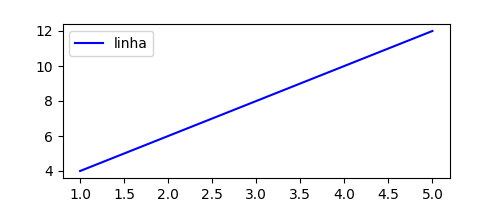

In [6]:
#Plote sua ordenada e sua abscissa fiducial (linha)

# dicas: - Exemplo de gráfico com eixos x e y, como linha ou pontos

########################################################################
# LEMBRE-SE QUE A CURVA FIDUCIAL É APENAS UMA REFERÊNCIA PRA CRIARMOS DADOS EXPERIMENTAIS SINTÉTICOS, E MAIS TARDE PARA VERIFICAR A ASSERTIVIDADE DO MODELO ESCOLHIDO E DO SEU MÉTODO DE AJUSTE
########################################################################

import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(5, 2))
ax1.plot([1,2,3,4,5],[4,6,8,10,12], color='blue', linestyle='-', marker='', label='linha')
ax1.legend()
display(f)

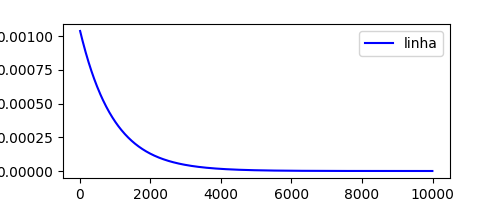

In [7]:
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(5, 2))
ax1.plot(X,fiducial, color='blue', linestyle='-', marker='', label='linha')
ax1.legend()
display(f)

In [8]:
#Plote a mesma curva, mas onde a absissa seja o logaritmo neperiano da distribuição exponencial fiducial
#
#dica:    - é possível operar uma função do tipo "log" em um vetor inteiro
#         - verifique que sendo o log a função inversa da exponencial, o resultado será um polinômio de mesma ordem em que o parâmetro lambda tem no expoente da exponencial
#             log(exp(x))=x; log(exp(x^2))=x^2

########################################################################
# LEMBRE-SE QUE A CURVA FIDUCIAL É APENAS UMA REFERÊNCIA PRA CRIAR DADOS EXPERIMENTAIS SINTÉTICOS, E MAIS TARDE PARA VERIFICAR A ASSERTIVIDADE DO MODELO ESCOLHIDO E DO SEU MÉTODO DE AJUSTE
########################################################################

In [9]:
log(lambd*exp(-lambd*x))=log(lambd)+log(exp(-lambd*x))=log(lambd)-lambd*x

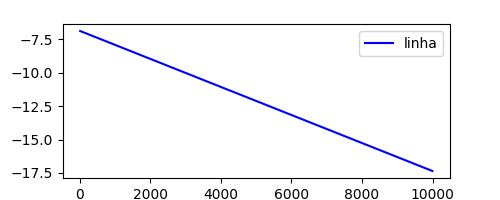

In [10]:
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(5, 2))
ax1.plot(X,np.log(fiducial), color='blue', linestyle='-', marker='', label='linha')
ax1.legend()
display(f)

In [11]:
#Para cada número da absissa fiducial, crie um novo valor da absissa simulando uma medida experimental, com centro no valor fiducial 
# e distribuição gaussiana com desvio padrão fixo (ruído) somado a um erro variável (sistemático)

# Y = fid(x)
# onde desvio = 10% do valor da medida + um residual de 10^-5

# dicas: - crie um novo vetor em função do vetor fiducial como no exemplo abaixo feito para uma função linear, mas atente para a diferença no desvio padrão
#        - utilize a função random.normal da biblioteca numpy, onde
#           random.normal(mu, sigma, N)
#           por exemplo: random.normal(10, 0.2, 3) vai gerar três números randômicos em uma distriuição gaussiana
#                                                  centralizada no número 10 com desvio padrão de 0.2


########################################################################
# ESTE CONJUNTO DE DADOS FARÁ O PAPEL DE DADOS EXPERIMENTAIS, NO CASO SÃO SINTÉTICOS, QUE SERÁ UTILIZADO PARA MODELAR E FAZER O AJUSTE
########################################################################

X_ex = [1,2,3,4,5,6]
fid_ex = [2,4,6,8,10,12]

Y_ex = [np.random.normal(y, 0.1, 1)[0] for y in fid_ex]

In [12]:
Y = [np.random.normal(y, 0.00001+0.1*y, 1)[0] for y in fiducial]

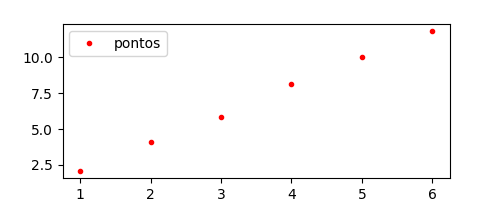

In [13]:
#Plote seus dados  esperimentais sintéticos (pontos)

import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(5, 2))
ax1.plot(X_ex,Y_ex, color='red', linestyle='', marker='.', label='pontos')
ax1.legend()
display(f)


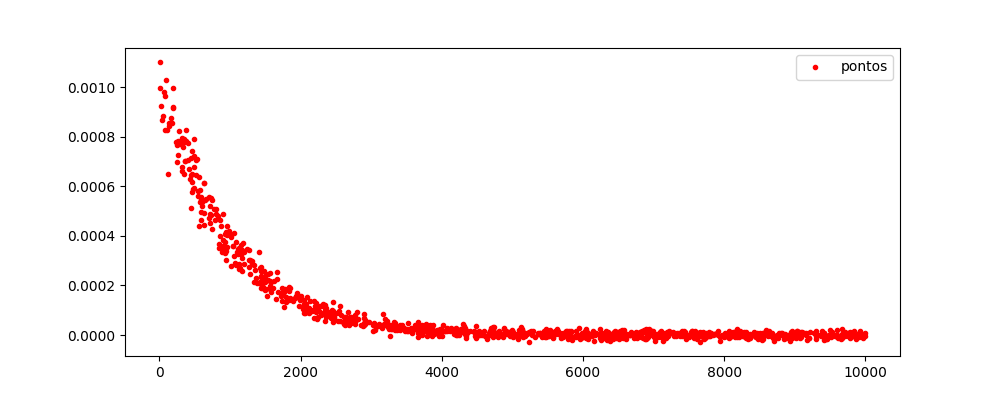

In [14]:

import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(X,Y, color='red', linestyle='', marker='.', label='pontos')
ax1.legend()
display(f)

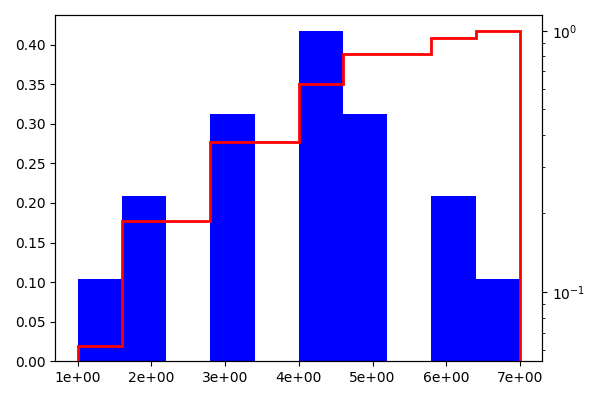

In [15]:
#Plote a PDF e a CDF juntos, do vetor simulado que criou, utilizando "hist" mas o segundo em um eixo diferente
#dica: -veja o exemplo de dois gráficos em uma mesma imagem com eixos diferentes
#      -veja os parâmetros "cumulative=True" e "density=True"
#      -caso esteja difícil a visualização, pode utilizar a opção "log=True"
#      -também pode mudar o estilo de formação com a função "set_major_formatter"
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
f, ax1 = plt.subplots(figsize=(6, 4))


ax1.hist([1,2,2,3,3,5,4,3,5,4,6,4,4,5,6,7], density=True,color='blue')

ax1_twin = ax1.twinx()

ax1_twin.hist([1,2,2,3,3,5,4,3,5,4,6,4,4,5,6,7], density=True, color='red', cumulative=True, linewidth=2, histtype='step', log=True)

ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

f.tight_layout()
display(f)

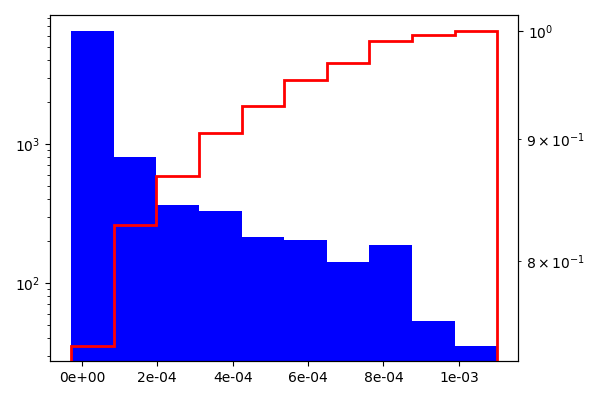

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
f, ax1 = plt.subplots(figsize=(6, 4))


ax1.hist(Y, density=True,color='blue',log=True)

ax1_twin = ax1.twinx()

ax1_twin.hist(Y, density=True, color='red', cumulative=True, linewidth=2, histtype='step',log=True)

ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

f.tight_layout()
display(f)

In [17]:
#Use o método dos mínimos quadrados para obter uma exponencial que mais se aproxime dos pontos gerados na abscissa experimental simulada

# dicas: - utilize um loop para testar vários valores de inclinação da reta e grave em um vetor o valor testado e o valor do erro quadrático
#        - use passos (uns 40) de 0.0001, começando em 0.0001 e indo até 0.002
#        - exemplo de ajuste para regressão linear:
#        - lambd*exp(-lambd*x)

import numpy as np
X_ex = [1,2,3,4,5,6]
Y_ex = [2.5,3.9,5,8.5,10,13]
       
b_valores_ex = []
erros_ex = []
for b0 in range(1,40):
  b0 = b0/10 #aqui o passo é de 0.1, divida pelo denomizador apropriado para ter passos de 10^-4
  b_valores_ex.append(b0)
  tentativa = [b0*x for x in X_ex]
  erros_ex.append(np.sum([(y-tentativa[i])**2 for i,y in enumerate(Y_ex)])/len(Y_ex))

In [18]:
import numpy as np
       
b_valores_ex = []
erros_ex = []
for b0 in range(1,40):
  b0 = b0/10000 #aqui o passo é de 0.1, divida pelo denomizador apropriado para ter passos de 10^-4
  b_valores_ex.append(b0)
  tentativa = [b0*np.exp(-b0*x) for x in X]
  erros_ex.append(np.sum([(y-tentativa[i])**2 for i,y in enumerate(Y)])/len(Y))

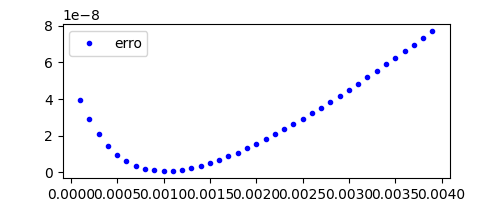

In [19]:
#Plot a curva de verossimilhança do teste anterior
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(5, 2))
ax1.plot(b_valores_ex,erros_ex, color='blue', linestyle='', marker='.', label='erro')
ax1.legend()
display(f)

In [20]:
#Encontre o valor de lambda que minimiza o erro, compare com o valor original de lambda que utilizou para criar a curva fiducial e os dados sintéticos
#
# dica:   - pode encontrar o índice do valor mínimo de uma lista e utilizar esse índice para encontrar o parâmetro em outra
b_valores_ex[erros_ex.index(min(erros_ex))]

Out[3]: 2.1

In [21]:
b_valores_ex[erros_ex.index(min(erros_ex))]

Out[45]: 0.001

In [22]:
# construa um modelo, de uma distribuição exponecial, que utilize o parâmetro lambda que encontrou que minimizou o erro quadrático
#dica: -siga o exemplo da regressão linear
b = b_valores_ex[erros_ex.index(min(erros_ex))]
modelo_ex = [b*x for x in X_ex]

In [23]:
modelo_ex = [0.001*np.exp(-0.001*x) for x in X]

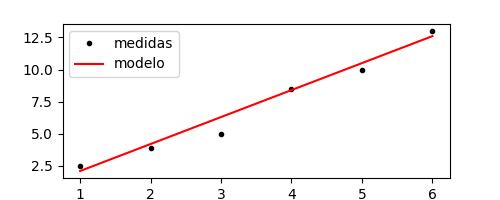

In [24]:
#Plote a PDF comparando os dados simulados (pontos pretos) sobreposta à nossa estimativa obtida pelo processo de melhor ajuste (reta vermelha)

# dicas: - combine dois gráficos como no exemplo anterior

import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(5, 2))
ax1.plot(X_ex,Y_ex, color='black', linestyle='', marker='.', label='medidas')
ax1.plot(X_ex,modelo_ex, color='red', linestyle='-', marker='', label='modelo')
ax1.legend()
display(f)

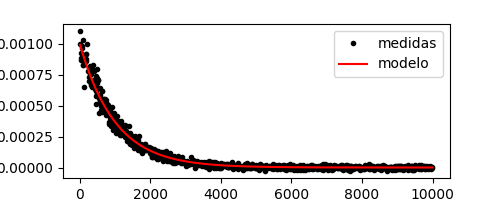

In [25]:
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(5, 2))
ax1.plot(X,Y, color='black', linestyle='', marker='.', label='medidas')
ax1.plot(X,modelo_ex, color='red', linestyle='-', marker='', label='modelo')
ax1.legend()
display(f)

In [26]:
lambd_modelo = 0.001
media = 1/lambd_modelo
mediana = np.log(2)/lambd_modelo
q1 = np.log(4/3)/lambd_modelo
q3 = np.log(4)/lambd_modelo
anomalia = q3+1.5*np.log(3)/lambd_modelo

In [27]:
media

Out[50]: 1000.0

In [28]:
mediana

Out[51]: 693.1471805599452

In [29]:
q1

Out[52]: 287.6820724517808

In [30]:
q3

Out[53]: 1386.2943611198905

In [31]:
anomalia

Out[56]: 3034.212794122055

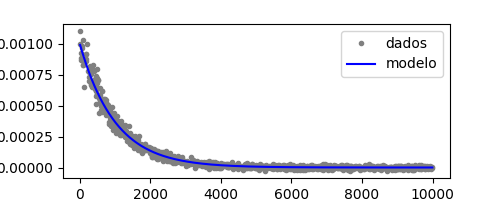

In [32]:
#Plote a PDF (azul) em conjunto com os dados experimentais (cinza pontilhado) 
#
#A partir do melhor ajuste obtido para lambda, calcule o valor e plote no gráfico como linhas verticais: 
#        a) média (verde)
#        b) mediana (laranda)
#        c) primeiro quartil (preto)
#        d) terceiro quartil (preto)
#        e) limiar de anomalias (vermelho)


# dicas: - combine dois gráficos como no exemplo anterior, mas usando os parâmetros "cumulative" e "log"
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(5, 2))
ax1.plot(X, Y, color='grey', label='dados', linestyle='', marker='.')
ax1.plot(X, modelo_ex, color='blue', label='modelo')

#ax1.axvline(np.median(modelo_ex), 0, 1, color='black', label='mediana')
#ax1.axvline(np.mean(modelo_ex), 0, 1, color='black', linestyle='--', label='média')

ax1.legend()
display(f)

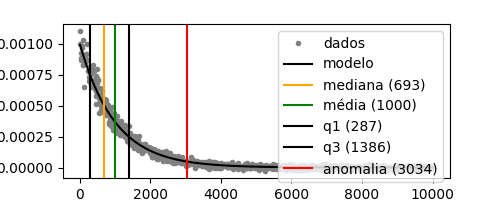

In [33]:
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(5, 2))
ax1.plot(X,Y, color='grey', linestyle='', marker='.', label='dados')
ax1.plot(X,modelo_ex, color='black', label='modelo')

#        a) média (verde)
#        b) mediana (laranda)
#        c) primeiro quartil (preto)
#        d) terceiro quartil (preto)
#        e) limiar de anomalias (vermelho)

ax1.axvline(mediana, 0, 1, color='orange', label='mediana ('+str(int(mediana))+')')
ax1.axvline(media, 0, 1, color='green', label='média ('+str(int(media))+')')
ax1.axvline(q1, 0, 1, color='black', label='q1 ('+str(int(q1))+')')
ax1.axvline(q3, 0, 1, color='black', label='q3 ('+str(int(q3))+')')
ax1.axvline(anomalia, 0, 1, color='red', label='anomalia ('+str(int(anomalia))+')')

ax1.legend()
display(f)